# Exploratory Data Analysis (EDA)
This notebook will perform a two-part exploratory analysis of the miRNA expression dataset used for tumor stage classification.

Base miRNA Features:
The first section will explore the original set of miRNA features. We will examine distributions, and evaluate feature correlations to understand the structure and variability of the baseline dataset.

New miRNA Features:
The second section will extend the analysis to include additional miRNAs previously associated with E-cadherin deregulation and tumor progression. These new features will be assessed in the same manner to identify patterns and potential predictive value.

The goal is to better understand the data before applying machine learning models and ensure that all features, both original and newly added, contribute meaningful insights

In [ ]:
!pip install scipy

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline
import pandas as pd
from scipy.stats.mstats import winsorize
from sklearn.ensemble import IsolationForest
from sklearn.cluster import DBSCAN
from sklearn.svm import OneClassSVM
from sklearn.preprocessing import StandardScaler

In [ ]:
# Reading the miRNA wrangled df
df_mir_expression = pd.read_csv('df_mir_expression_wrangled.csv', index_col='File_ID')
df_mir_expression.head()

In [ ]:
# Use the describe function to obtain descriptive statistics of each miRNA feature
df_mir_expression.describe()

,hsa-mir-29a,hsa-mir-125b-1,hsa-mir-125b-2,hsa-mir-145,hsa-mir-149,hsa-mir-1246,hsa-mir-4488,hsa-mir-492,hsa-mir-200a,hsa-mir-338,hsa-mir-29c,hsa-mir-148a,hsa-mir-424,hsa-mir-210,Stages_encoded
count,847.000000,847.000000,847.000000,847.000000,847.000000,847.000000,847.000000,847.000000,847.000000,847.000000,847.000000,847.000000,847.000000,847.000000,847.000000
mean,7726.642076,244.882489,256.388222,2834.128576,55.088328,0.451910,0.025805,0.213388,2997.122164,432.638149,779.351256,55082.156308,335.487604,1219.954659,0.484061
std,4495.792078,373.207590,395.000903,4223.373686,223.272946,1.618264,0.153862,0.646424,2537.058930,551.122483,703.277281,46784.385250,886.730203,1683.287495,0.500041
min,114.855000,0.000000,0.000000,0.000000,0.873000,0.000000,0.000000,0.000000,106.451000,0.248000,24.348000,902.312000,0.000000,3.932000,0.000000
25%,4660.314500,53.679500,53.370000,1057.486500,6.599500,0.000000,0.000000,0.000000,1613.492500,100.865000,305.618000,14450.191000,76.808500,271.886000,0.000000
50%,6757.455000,115.635000,119.815000,1933.907000,13.419000,0.000000,0.000000,0.000000,2474.591000,228.553000,619.548000,43045.964000,133.054000,652.201000,0.000000
75%,9643.861500,227.153000,232.715000,3330.560500,40.639500,0.354000,0.000000,0.147500,3688.707000,552.687000,1052.197000,86426.286000,250.238500,1425.336500,1.000000
max,35179.578000,3253.184000,3263.634000,72084.659000,5297.712000,28.179000,2.527000,7.633000,35445.754000,4343.724000,8080.341000,241521.548000,14532.710000,14935.597000,1.000000


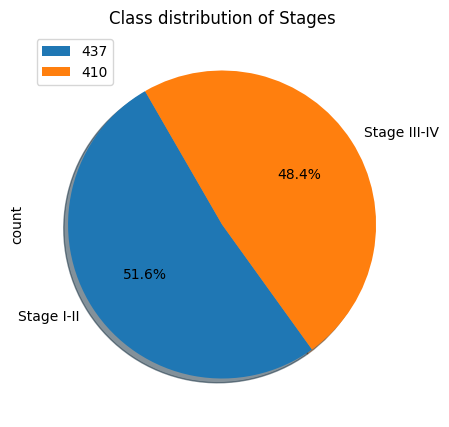

In [ ]:
# Lets see whether the classes are balanced or not
df_stages = df_mir_expression['Stages'].value_counts()
# Build a pie plot to visualize class distribution
df_stages.plot(kind='pie', figsize=(5, 5), autopct='%1.1f%%', startangle=120, shadow=True)
plt.title('Class distribution of Stages')
plt.legend(labels=df_stages.unique(), loc='upper left')

# To better visualize the miRNA expression features we group them by a common characteristic and plot them to find hidden patterns.

(array([0, 1]), [Text(0, 0, 'Stage I-II'), Text(1, 0, 'Stage III-IV')])

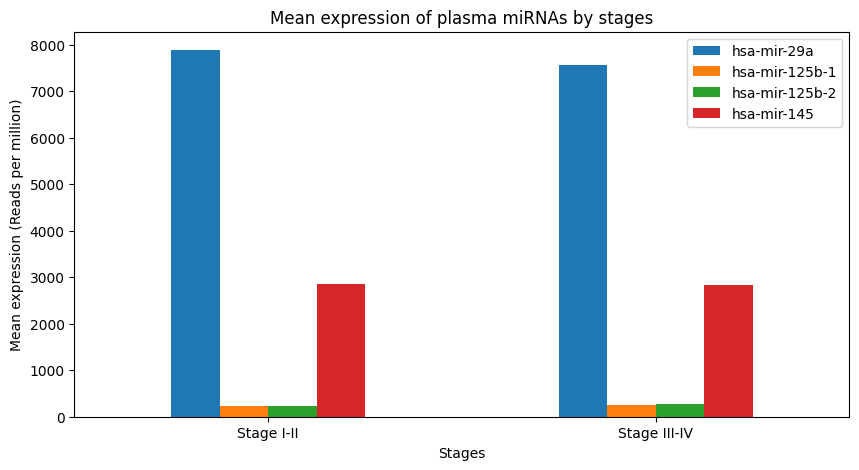

In [ ]:
# Selecting miRNAs that can be found in plasma
plasma_mir_columns = ['hsa-mir-29a', 'hsa-mir-125b-1','hsa-mir-125b-2', 'hsa-mir-145']
df_plasma = df_mir_expression.groupby('Stages')[plasma_mir_columns].mean() # Group by stages and calculate the mean of each miRNA feature
# Plot a bar graph grouped by stages of the mean expression of each miRNA
df_plasma.plot(kind='bar', figsize=(10, 5))
plt.title('Mean expression of plasma miRNAs by stages')
plt.ylabel('Mean expression (Reads per million)')
plt.xlabel('Stages')
plt.xticks(rotation=0)

(array([0, 1]), [Text(0, 0, 'Stage I-II'), Text(1, 0, 'Stage III-IV')])

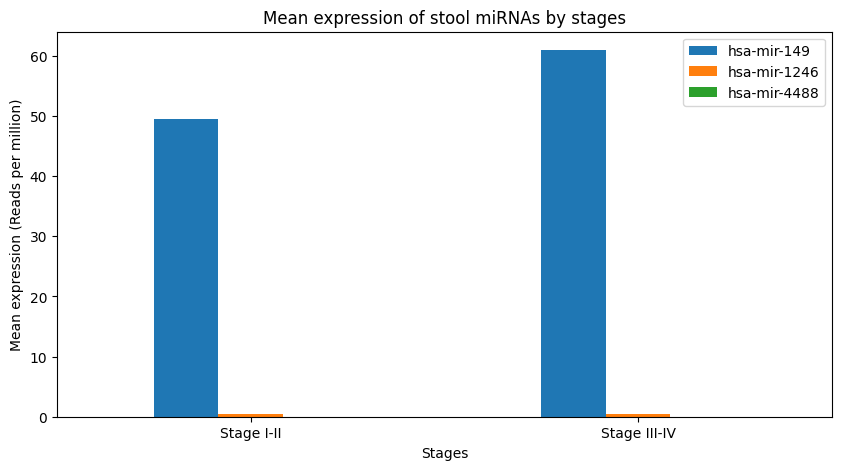

In [ ]:
# Selecting miRNAs that can be found in stool
stool_mir_columns = ['hsa-mir-149', 'hsa-mir-1246', 'hsa-mir-4488']
df_stool = df_mir_expression.groupby('Stages')[stool_mir_columns].mean() # Group by stages and calculate the mean of each miRNA feature
# Plot a bar graph grouped by stages of the mean expression of each miRNA
df_stool.plot(kind='bar', figsize=(10, 5))
plt.title('Mean expression of stool miRNAs by stages')
plt.ylabel('Mean expression (Reads per million)')
plt.xlabel('Stages')
plt.xticks(rotation=0)

(array([0, 1]), [Text(0, 0, 'Stage I-II'), Text(1, 0, 'Stage III-IV')])

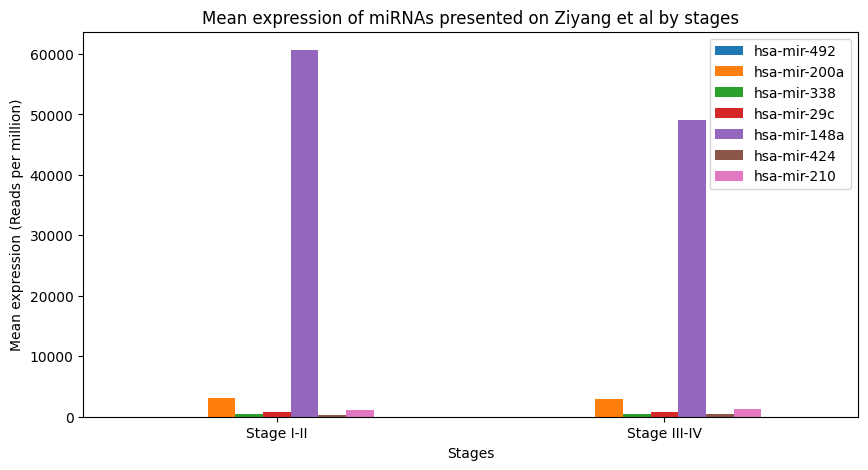

In [ ]:
# Selecting miRNAs that were found to be significantly expressed in a CRC cohort by Ziyang et al.
ziyang_mir_columns = ['hsa-mir-492', 'hsa-mir-200a', 'hsa-mir-338', 'hsa-mir-29c', 'hsa-mir-148a', 'hsa-mir-424', 'hsa-mir-210']
df_ziyang = df_mir_expression.groupby('Stages')[ziyang_mir_columns].mean() # Group by stages and calculate the mean of each miRNA feature
# Plot a bar graph grouped by stages of the mean expression of each miRNA
df_ziyang.plot(kind='bar', figsize=(10, 5))
plt.title('Mean expression of miRNAs presented on Ziyang et al by stages')
plt.ylabel('Mean expression (Reads per million)')
plt.xlabel('Stages')
plt.xticks(rotation=0)

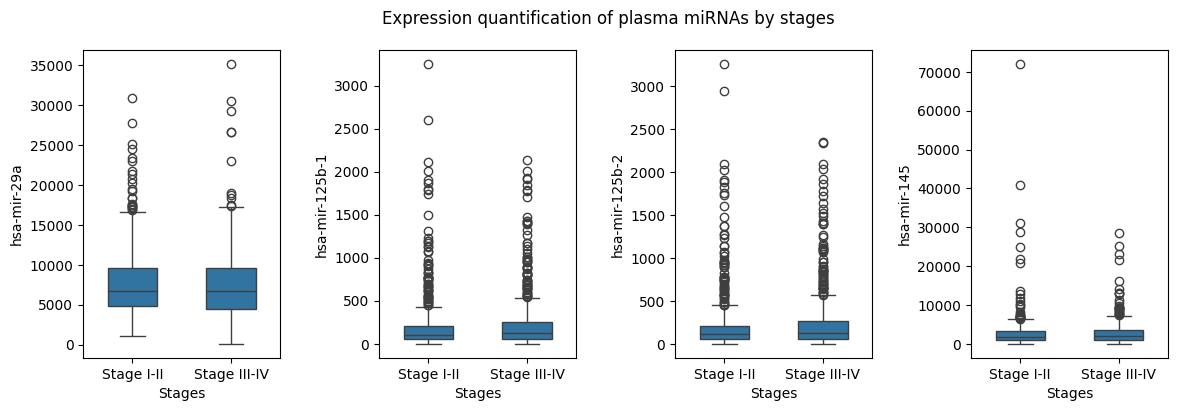

In [ ]:
# Making box sub-plots of each plasma miRNA expression distribution
fig = plt.figure(figsize=(14, 4))
ax0 = fig.add_subplot(1, 4, 1)
ax1 = fig.add_subplot(1, 4, 2)
ax2 = fig.add_subplot(1, 4, 3)
ax3 = fig.add_subplot(1, 4, 4)
axes = [ax0, ax1, ax2, ax3]
# Built a loop to generate the individual plots
for i, plasma_mir in enumerate(plasma_mir_columns):
  sns.boxplot(x='Stages', y=plasma_mir, data=df_mir_expression, ax=axes[i], width=1, gap=0.5)
plt.suptitle('Expression distribution of plasma miRNAs by stages')
plt.subplots_adjust(wspace=0.5)

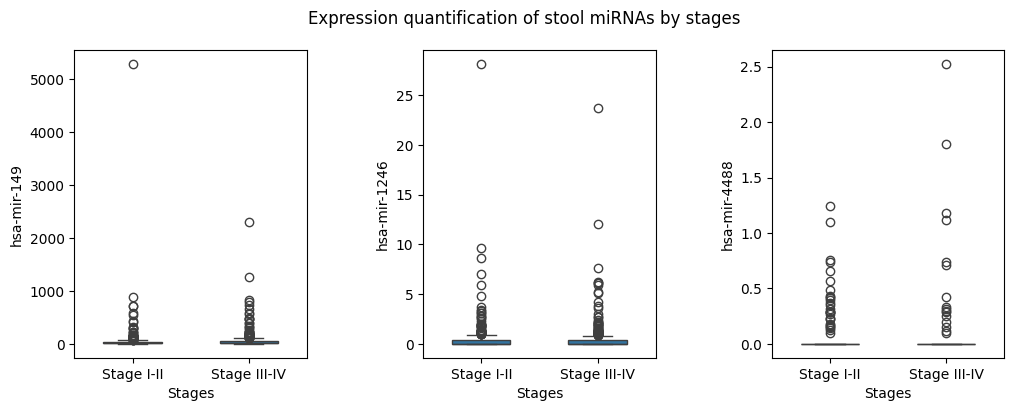

In [ ]:
# Making box sub-plots of each stool miRNA expression distribution
fig = plt.figure(figsize=(12, 4))
ax0 = fig.add_subplot(1, 3, 1)
ax1 = fig.add_subplot(1, 3, 2)
ax2 = fig.add_subplot(1, 3, 3)
axes = [ax0, ax1, ax2]
# Built a loop to generate the individual plots
for i, stool_mir in enumerate(stool_mir_columns):
  sns.boxplot(x='Stages', y=stool_mir, data=df_mir_expression, ax=axes[i], width=1, gap=0.5)
plt.suptitle('Expression distribution of stool miRNAs by stages')
plt.subplots_adjust(wspace=0.5)

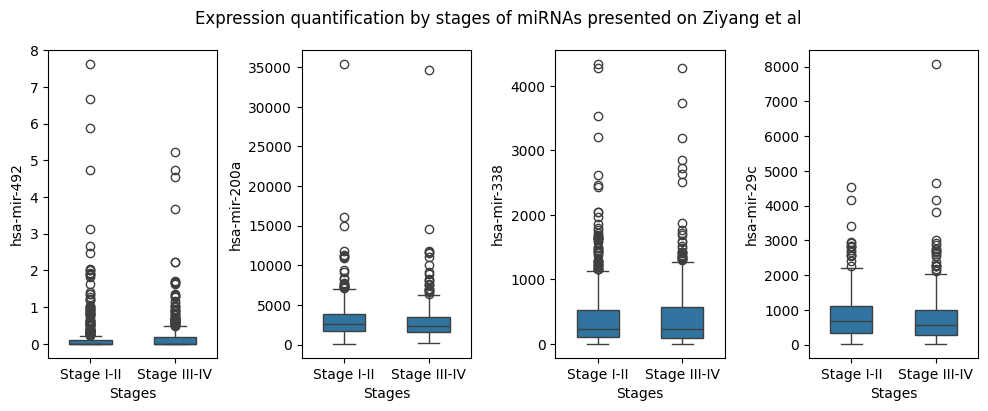

In [ ]:
# Making box sub-plots of each ziyang miRNA expression distribution
fig = plt.figure(figsize=(12, 4))
ax0 = fig.add_subplot(1, 4, 1)
ax1 = fig.add_subplot(1, 4, 2)
ax2 = fig.add_subplot(1, 4, 3)
ax3 = fig.add_subplot(1, 4, 4)
axes = [ax0, ax1, ax2, ax3]
# Built a loop to generate the individual plots
for i, ziyang_mir in enumerate(ziyang_mir_columns[0:4]):
  sns.boxplot(x='Stages', y=ziyang_mir, data=df_mir_expression, ax=axes[i], width=1, gap=0.5)
plt.suptitle('Expression distribution by stages of miRNAs presented on Ziyang et al')
plt.subplots_adjust(wspace=0.5)

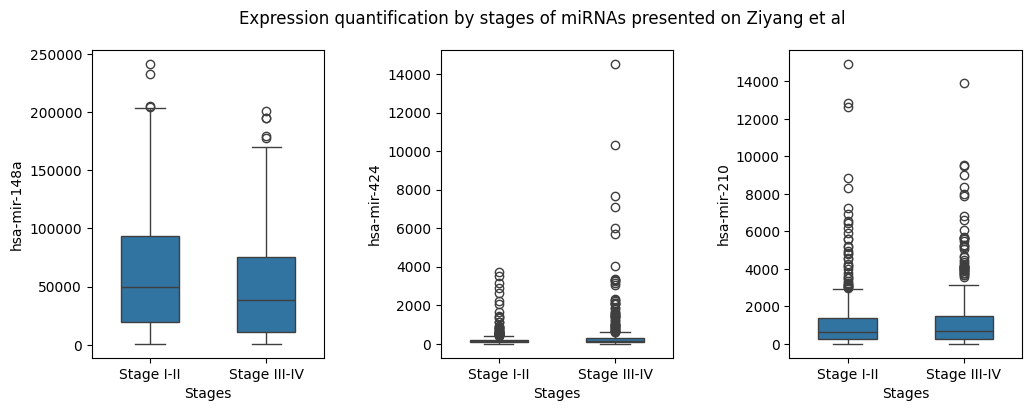

In [ ]:
# Making box sub-plots of each ziyang miRNA expression distribution
fig = plt.figure(figsize=(12, 4))
ax0 = fig.add_subplot(1, 3, 1)
ax1 = fig.add_subplot(1, 3, 2)
ax2 = fig.add_subplot(1, 3, 3)
axes = [ax0, ax1, ax2]
# Built a loop to generate the individual plots
for i, ziyang_mir in enumerate(ziyang_mir_columns[4:8]):
  sns.boxplot(x='Stages', y=ziyang_mir, data=df_mir_expression, ax=axes[i], width=1, gap=0.5)
plt.suptitle('Expression distribution by stages of miRNAs presented on Ziyang et al')
plt.subplots_adjust(wspace=0.5)

To evaluate what kind of relationships between features exist we use the corr() function and plot a correlation matrix. Also, we evaluate the importance of each feature with the target variable.

In [ ]:
# Select the numerical features without the target variable
numeric_df = df_mir_expression.select_dtypes(include=['float64'])
# Create the correlation data frame
df_corr = numeric_df.corr()

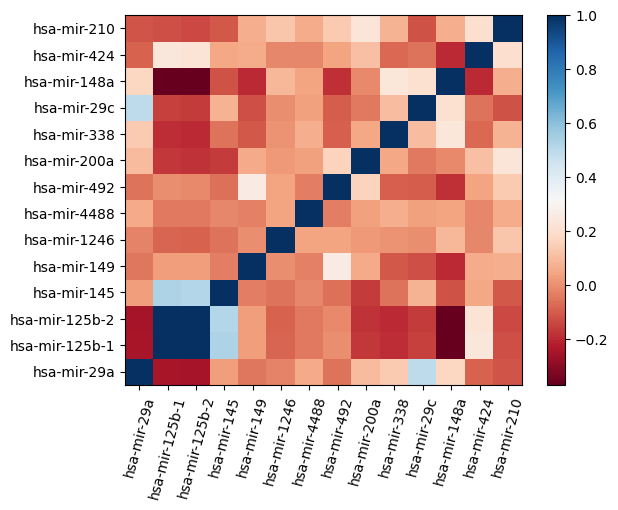

In [ ]:
# Plot the correlation matrix
plt.pcolor(df_corr, cmap='RdBu')
plt.title('Correlation matrix between miRNAs related with colorectal cancer progression')
plt.yticks(np.arange(0.5, len(numeric_df.columns) + 0.5, 1), numeric_df.columns)
plt.xticks(np.arange(0.5, len(numeric_df.columns) + 0.5, 1), numeric_df.columns, rotation=75)
plt.colorbar()
plt.show()

In [ ]:
# Change the categorical target variable to a numerical binary one
stage_mapping = {'Stage I-II':0, 'Stage III-IV':1}
df_mir_expression['Stages_encoded'] = df_mir_expression['Stages'].replace(stage_mapping)
# Drop the categorical column
df_mir_expression.drop('Stages', axis=1, inplace=True)
df_mir_expression.head()

<ipython-input-17-712788725ea6>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_mir_expression['Stages_encoded'] = df_mir_expression['Stages'].replace(stage_mapping)


<Axes: >

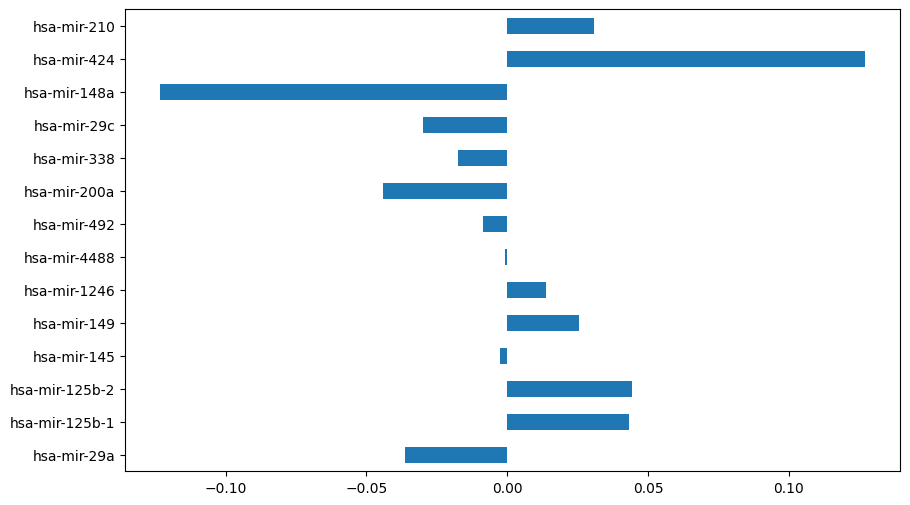

In [ ]:
# Calculate the correlation between the features and show only the relationships with the target variable
df_corr = df_mir_expression.corr()['Stages_encoded'].drop('Stages_encoded')
# Plot the correlation data frame
df_corr.plot(kind='barh', figsize=(10, 6))
plt.title('Correlation between miRNAs and tumor stage')

In [ ]:
#df_mir_expression.to_csv('df_mir_expression_en_outliers.csv')
#from google.colab import files

#files.download('df_mir_expression_en_outliers.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#Analysis of new miRNA features:
The exploration of the new data frame will be made again for the 10 new features which aim to increase model accuracy.

In [ ]:
# Reading the new df
df_mir_new = pd.read_csv('df_mir_new.csv', index_col='File_ID')
df_mir_new.head()

,hsa-mir-29a,hsa-mir-125b-1,hsa-mir-125b-2,hsa-mir-145,hsa-mir-149,hsa-mir-1246,hsa-mir-4488,hsa-mir-492,hsa-mir-200a,hsa-mir-338,...,hsa-mir-200a.1,hsa-mir-200b,hsa-mir-200c,hsa-mir-141,hsa-mir-210.1,hsa-mir-135b,hsa-mir-218-1,hsa-mir-218-2,hsa-mir-429,Stages.1
File_ID,,,,,,,,,,,,,,,,,,,,,
3cd62167-7962-44ea-8923-6e9c7fc97807.mirbase21.isoforms.quantification.txt,6433.475,96.445,100.829,2455.026,3.705,0.000,0.0,0.062,1066.082,147.755,...,1066.082,1034.098,6698.112,589.661,290.508,31.366,9.015,8.274,174.243,Stage I-II
ef4cd175-6f73-4360-b2c6-71b424d64f53.mirbase21.isoforms.quantification.txt,6301.933,79.897,79.763,1111.711,5.908,0.269,0.0,0.000,2083.501,975.416,...,2083.501,2178.169,13660.925,2378.785,1422.840,143.143,2.551,1.611,321.468,Stage I-II
98694eb1-1282-4426-8fb2-001ac8190323.mirbase21.isoforms.quantification.txt,5633.066,87.079,91.507,2537.585,1.968,0.492,0.0,0.492,3693.225,139.720,...,3693.225,2745.689,12168.406,3105.812,719.753,121.517,1.476,3.444,573.146,Stage I-II
a6f1d4ee-b216-4b96-95a6-5705662254d7.mirbase21.isoforms.quantification.txt,17290.156,151.468,158.526,3408.302,54.561,0.000,0.0,0.000,3575.242,388.714,...,3575.242,4080.136,17627.566,3576.600,69.491,234.260,7.872,6.515,585.513,Stage I-II
e3f4c57a-45e8-4dd6-96b1-e12ba2bdb415.mirbase21.isoforms.quantification.txt,9060.427,85.355,81.798,1135.932,4.268,0.000,0.0,0.000,2634.623,522.088,...,2634.623,1672.246,12480.315,2198.601,396.189,135.145,9.958,4.979,233.304,Stage I-II


In [ ]:
# Calculating basic statistics of the new miRNA features
miRNA_new_features_list = ['hsa-mir-200a',
    'hsa-mir-200b', 'hsa-mir-200c',
    'hsa-mir-141', 'hsa-mir-210', 'hsa-mir-135b', 'hsa-mir-218-1',
    'hsa-mir-218-2', 'hsa-mir-429']
df_mir_new[miRNA_new_features_list].describe()

,hsa-mir-200a,hsa-mir-200b,hsa-mir-200c,hsa-mir-141,hsa-mir-210,hsa-mir-135b,hsa-mir-218-1,hsa-mir-218-2,hsa-mir-429
count,845.000000,845.000000,845.000000,845.000000,845.000000,845.000000,845.000000,845.000000,845.000000
mean,2994.351355,5455.694721,16219.219872,4905.852517,1221.072110,266.617527,14.958824,10.508708,783.388464
std,2538.692373,6261.202975,16249.788118,9213.587898,1684.814961,593.746960,21.137543,13.190701,1021.944131
min,106.451000,117.434000,613.785000,61.433000,3.932000,0.949000,0.000000,0.000000,22.054000
25%,1611.358000,1748.052000,6483.710000,1338.216000,272.454000,37.611000,4.053000,3.350000,284.709000
50%,2472.935000,2870.189000,11910.968000,2107.758000,652.201000,89.116000,8.355000,7.164000,485.682000
75%,3687.734000,6703.061000,19383.729000,3654.292000,1427.833000,218.295000,15.572000,12.765000,845.969000
max,35445.754000,47738.402000,145912.281000,105041.440000,14935.597000,7311.233000,182.731000,159.367000,13494.481000


(array([0, 1]), [Text(0, 0, 'Stage I-II'), Text(1, 0, 'Stage III-IV')])

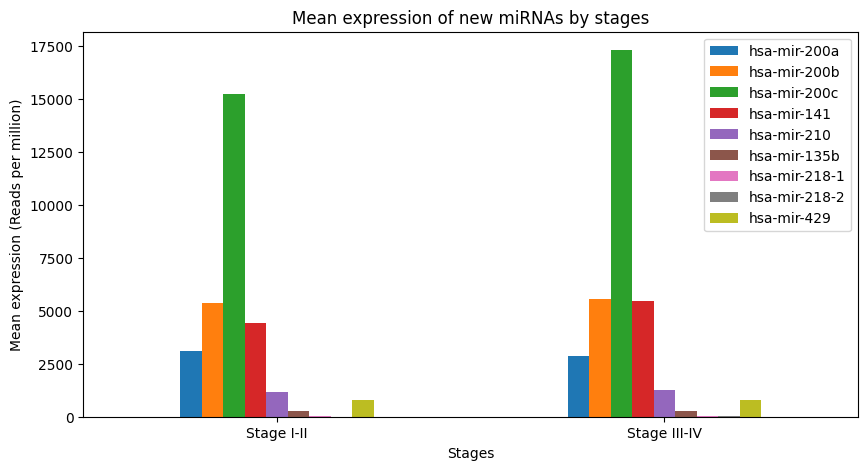

In [ ]:
# Calculating the mean of each miRNA feature grouped by stages
df_new = df_mir_new.groupby('Stages')[miRNA_new_features_list].mean()
df_new.plot(kind='bar', figsize=(10, 5))
# Plot the mean expression by stages
plt.title('Mean expression of new miRNAs by stages')
plt.ylabel('Mean expression (Reads per million)')
plt.xlabel('Stages')
plt.xticks(rotation=0)

In [ ]:
# Change the categorical target variable to a numerical binary one
stage_mapping = {'Stage I-II':0, 'Stage III-IV':1}
df_mir_new['Stages_encoded'] = df_mir_new['Stages'].replace(stage_mapping)
df_mir_new.drop('Stages', axis=1, inplace=True)
df_mir_new.head()

<ipython-input-21-3683038720>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_mir_new['Stages_encoded'] = df_mir_new['Stages'].replace(stage_mapping)


,hsa-mir-29a,hsa-mir-125b-1,hsa-mir-125b-2,hsa-mir-145,hsa-mir-149,hsa-mir-1246,hsa-mir-4488,hsa-mir-492,hsa-mir-200a,hsa-mir-338,...,hsa-mir-200b,hsa-mir-200c,hsa-mir-141,hsa-mir-210.1,hsa-mir-135b,hsa-mir-218-1,hsa-mir-218-2,hsa-mir-429,Stages.1,Stages_encoded
File_ID,,,,,,,,,,,,,,,,,,,,,
3cd62167-7962-44ea-8923-6e9c7fc97807.mirbase21.isoforms.quantification.txt,6433.475,96.445,100.829,2455.026,3.705,0.000,0.0,0.062,1066.082,147.755,...,1034.098,6698.112,589.661,290.508,31.366,9.015,8.274,174.243,Stage I-II,0
ef4cd175-6f73-4360-b2c6-71b424d64f53.mirbase21.isoforms.quantification.txt,6301.933,79.897,79.763,1111.711,5.908,0.269,0.0,0.000,2083.501,975.416,...,2178.169,13660.925,2378.785,1422.840,143.143,2.551,1.611,321.468,Stage I-II,0
98694eb1-1282-4426-8fb2-001ac8190323.mirbase21.isoforms.quantification.txt,5633.066,87.079,91.507,2537.585,1.968,0.492,0.0,0.492,3693.225,139.720,...,2745.689,12168.406,3105.812,719.753,121.517,1.476,3.444,573.146,Stage I-II,0
a6f1d4ee-b216-4b96-95a6-5705662254d7.mirbase21.isoforms.quantification.txt,17290.156,151.468,158.526,3408.302,54.561,0.000,0.0,0.000,3575.242,388.714,...,4080.136,17627.566,3576.600,69.491,234.260,7.872,6.515,585.513,Stage I-II,0
e3f4c57a-45e8-4dd6-96b1-e12ba2bdb415.mirbase21.isoforms.quantification.txt,9060.427,85.355,81.798,1135.932,4.268,0.000,0.0,0.000,2634.623,522.088,...,1672.246,12480.315,2198.601,396.189,135.145,9.958,4.979,233.304,Stage I-II,0


In [ ]:
# First we need to check if the new df is ready for the corr function
df_mir_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 845 entries, 3cd62167-7962-44ea-8923-6e9c7fc97807.mirbase21.isoforms.quantification.txt to bc1a0208-4ce8-4ce6-bf37-ee83e5a202e9.mirbase21.isoforms.quantification.txt
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   hsa-mir-29a     845 non-null    float64
 1   hsa-mir-125b-1  845 non-null    float64
 2   hsa-mir-125b-2  845 non-null    float64
 3   hsa-mir-145     845 non-null    float64
 4   hsa-mir-149     845 non-null    float64
 5   hsa-mir-1246    845 non-null    float64
 6   hsa-mir-4488    845 non-null    float64
 7   hsa-mir-492     845 non-null    float64
 8   hsa-mir-200a    845 non-null    float64
 9   hsa-mir-338     845 non-null    float64
 10  hsa-mir-29c     845 non-null    float64
 11  hsa-mir-148a    845 non-null    float64
 12  hsa-mir-424     845 non-null    float64
 13  hsa-mir-210     845 non-null    float64
 14  hsa-mir-200a.1  845 non-null   

In [ ]:
# Dropping duplicated columns
df_mir_new.drop(['Stages.1', 'hsa-mir-200a.1', 'hsa-mir-210.1' ], axis=1, inplace=True)
df_mir_new.shape

(845, 24)

<Axes: >

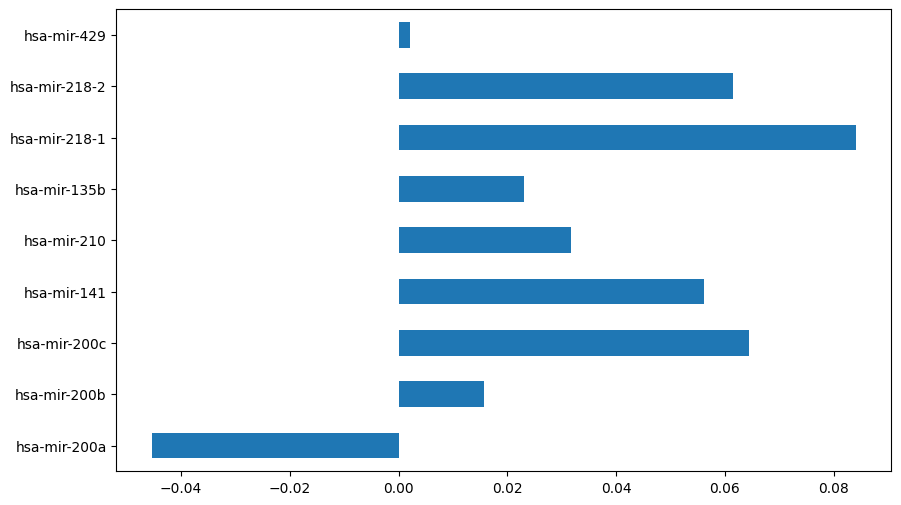

In [ ]:
# Calculate the correlation between the features and show only the relationships with the target variable
miRNA_new_features_list.append('Stages_encoded')
# Plot the correlation data frame
df_corr_new = df_mir_new[miRNA_new_features_list].corr()['Stages_encoded'].drop('Stages_encoded')
df_corr_new.plot(kind='barh', figsize=(10, 6))

In [ ]:
df_mir_new.to_csv('df_mir_new_with_outliers.csv')
from google.colab import files
# Download the encoded new df with outliers
files.download('df_mir_new_with_outliers.csv')

NameError: name 'df_mir_new' is not defined